In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model

from keras.preprocessing.image import ImageDataGenerator

import pandas as pd

In [ ]:

from tensorflow.keras.applications import VGG16

pre_model = VGG16(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = 'imagenet')

# Make all the layers in the pre-model non-trainable
for layer in pre_model.layers:
    layer.trainable = False

58892288/58889256 [==============================] - 1s 0us/step


In [ ]:

last_layer = pre_model.get_layer('block5_conv3')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 9, 9, 512)


In [ ]:
loss = 'mean_squared_error'
metrics = ['mse','mae']
batch_size=64
epochs = 4

In [ ]:
from tensorflow.keras.optimizers import Adam

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.4)(x)                  
# Add a final linear layer for classification
x = layers.Dense  (1, activation='linear')(x)           

model = Model( pre_model.input, x) 

model.compile(optimizer = Adam(lr=0.001), 
              loss = 'mean_squared_error',
              metrics = metrics) 

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0   

In [ ]:
raw_dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/SDSS.csv")
train_df = raw_dataset.copy()
train_df.head()

,img_path,z
0,/content/drive/MyDrive/Colab Notebooks/galaxy_...,0.037450
1,/content/drive/MyDrive/Colab Notebooks/galaxy_...,-99.990000
2,/content/drive/MyDrive/Colab Notebooks/galaxy_...,0.029610
3,/content/drive/MyDrive/Colab Notebooks/galaxy_...,0.002882
4,/content/drive/MyDrive/Colab Notebooks/galaxy_...,0.038340


In [ ]:
import numpy as np
cnt=0
for row in train_df['z']:
    try:
        if row==-99.990000 or row==-100.000000 :
          train_df.loc[cnt, 'z']=np.nan
    except ValueError:
        pass
    cnt+=1

In [ ]:
train_df.isna().sum()

img_path       0
z           1357
dtype: int64

In [ ]:
median = train_df['z'].median()
train_df['z'].fillna(median, inplace=True)

In [ ]:
train_df.isna().sum()

img_path    0
z           0
dtype: int64

In [ ]:
dataset=train_df.copy()

In [ ]:
train_df = dataset.sample(frac=0.8, random_state=0)
test_df = dataset.drop(train_df.index)

In [ ]:
datagen = ImageDataGenerator( 
            rescale=1./255.,
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            validation_split=0.30,
            fill_mode='nearest')

train_generator=datagen.flow_from_dataframe(
            dataframe=train_df,
            directory=None,
            x_col="img_path",
            y_col="z",
            subset="training",
            batch_size=32,
            seed=42,
            shuffle=True,
            class_mode="other",
            target_size=(150,150))

valid_generator=datagen.flow_from_dataframe(
            dataframe=train_df,
            directory=None,
            x_col="img_path",
            y_col="z",
            subset="validation",
            batch_size=32,
            seed=42,
            class_mode="other",
            target_size=(150,150))

test_datagen=ImageDataGenerator(rescale=1./255.)

test_generator=test_datagen.flow_from_dataframe(
            dataframe=test_df,
            directory=None,
            x_col="img_path",
            y_col=None,
            batch_size=batch_size,
            seed=42,
            class_mode=None,
            target_size=(150,150))           

--- Logging error ---
Traceback (most recent call last):
  File "/usr/lib/python3.7/logging/__init__.py", line 1025, in emit
    msg = self.format(record)
  File "/usr/lib/python3.7/logging/__init__.py", line 869, in format
    return fmt.format(record)
  File "/usr/lib/python3.7/logging/__init__.py", line 608, in format
    record.message = record.getMessage()
  File "/usr/lib/python3.7/logging/__init__.py", line 369, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 845, in launch_instance
    app.start()
  File "/usr/local/lib/pytho

Found 2497 validated image filenames.


--- Logging error ---
Traceback (most recent call last):
  File "/usr/lib/python3.7/logging/__init__.py", line 1025, in emit
    msg = self.format(record)
  File "/usr/lib/python3.7/logging/__init__.py", line 869, in format
    return fmt.format(record)
  File "/usr/lib/python3.7/logging/__init__.py", line 608, in format
    record.message = record.getMessage()
  File "/usr/lib/python3.7/logging/__init__.py", line 369, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 845, in launch_instance
    app.start()
  File "/usr/local/lib/pytho

Found 1069 validated image filenames.
Found 892 validated image filenames.


In [ ]:
from keras.callbacks import EarlyStopping
earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=8, verbose=1, mode='auto')


In [ ]:
history = model.fit(train_generator,
                    validation_data=valid_generator,
                    epochs=50,
                    steps_per_epoch=10,
                    verbose=1,
                    callbacks=[earlystopper])

Epoch 1/50
10/10 [==============================] - 324s 34s/step - loss: 552.0917 - mse: 552.0917 - mae: 13.3090 - val_loss: 2.6155 - val_mse: 2.6155 - val_mae: 1.6120
Epoch 2/50
10/10 [==============================] - 314s 34s/step - loss: 4.5212 - mse: 4.5212 - mae: 1.7036 - val_loss: 0.4065 - val_mse: 0.4065 - val_mae: 0.6074
Epoch 3/50
10/10 [==============================] - 318s 34s/step - loss: 2.7595 - mse: 2.7595 - mae: 1.3325 - val_loss: 0.0501 - val_mse: 0.0501 - val_mae: 0.1242
Epoch 4/50
10/10 [==============================] - 313s 33s/step - loss: 0.8417 - mse: 0.8417 - mae: 0.7224 - val_loss: 0.0560 - val_mse: 0.0560 - val_mae: 0.1516
Epoch 5/50
10/10 [==============================] - 313s 34s/step - loss: 0.4992 - mse: 0.4992 - mae: 0.5609 - val_loss: 0.0326 - val_mse: 0.0326 - val_mae: 0.0714
Epoch 6/50
10/10 [==============================] - 311s 33s/step - loss: 0.2371 - mse: 0.2371 - mae: 0.3785 - val_loss: 0.0311 - val_mse: 0.0311 - val_mae: 0.0580
Epoch 7/50


In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist

,loss,mse,mae,val_loss,val_mse,val_mae,epoch
0,309.302185,309.302185,8.885818,2.615462,2.615462,1.611986,0
1,4.139109,4.139109,1.633675,0.406480,0.406480,0.607376,1
2,2.008870,2.008870,1.140914,0.050066,0.050066,0.124200,2
3,0.769852,0.769852,0.697555,0.056038,0.056038,0.151614,3
4,0.446431,0.446431,0.530082,0.032563,0.032563,0.071352,4
5,0.202921,0.202921,0.349604,0.031148,0.031148,0.057968,5
6,0.114583,0.114583,0.280427,0.048676,0.048676,0.143687,6
7,0.083779,0.083779,0.243380,0.027801,0.027801,0.038667,7
8,0.064526,0.064526,0.215940,0.029096,0.029096,0.044932,8
9,0.049996,0.049996,0.178066,0.027359,0.027359,0.032303,9


In [ ]:

import matplotlib.pyplot as plt
%matplotlib inline
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error [z]')
  plt.legend()
  plt.grid(True)

  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Err [z]')
  plt.plot(hist['epoch'], hist['mae'], label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'], label='Val Error')
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Squared Err [$z^2$]')
  plt.plot(hist['epoch'], hist['mse'], label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'], label='Val Error')
  plt.legend()



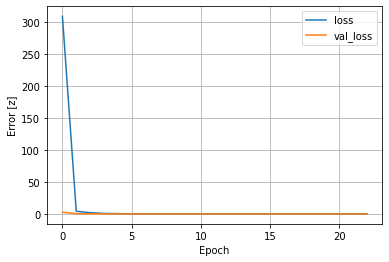

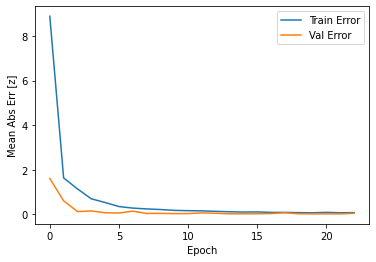

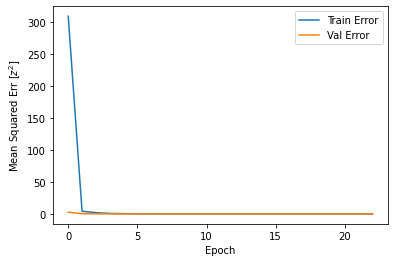

In [ ]:
plot_loss(history)

In [ ]:
model.save("MainZmodel_vgg")

INFO:tensorflow:Assets written to: MainZmodel_vgg/assets


In [ ]:
test_features = test_df.copy()
test_labels = test_features.pop('z')

In [ ]:
test_predictions = model.predict(test_generator).flatten()


In [ ]:
np.save('/content/drive/MyDrive/Colab Notebooks/MainVggpredictions', test_predictions)

In [ ]:
test_predictions

array([-0.02034224, -0.0261186 , -0.02567275, -0.01913811, -0.02959118,
       -0.02183121, -0.02228227, -0.02360803, -0.02180323, -0.01996563,
       -0.02629888, -0.03990575, -0.02984136, -0.02888045, -0.01813351,
       -0.02244404, -0.02090772, -0.03480326, -0.02755329, -0.03055094,
       -0.02439303, -0.01716209, -0.02628995, -0.01769989, -0.02188587,
       -0.01966479, -0.02006311, -0.02234462, -0.01135835, -0.01816527,
       -0.01936389, -0.02358705, -0.02050253, -0.02346168, -0.02379719,
       -0.01929624, -0.01725584, -0.01092485, -0.02399895, -0.02407073,
       -0.02174782, -0.03908805, -0.02433312, -0.02741629, -0.02029357,
       -0.01500411, -0.02389983, -0.01927943, -0.02033518, -0.03072391,
       -0.0415182 , -0.02386137, -0.02615946, -0.0169835 , -0.02827142,
       -0.01533023, -0.02309091, -0.01248026, -0.02027927, -0.01359505,
       -0.03173329, -0.01377136, -0.03028033, -0.01661628, -0.02694814,
       -0.03096807, -0.02077659, -0.01497477, -0.02846049, -0.01

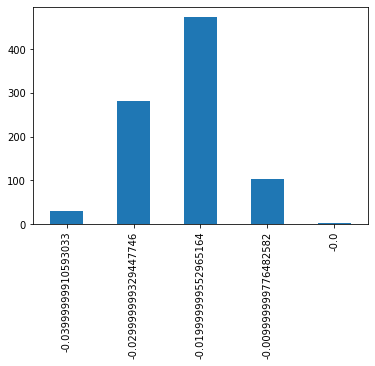

In [ ]:
fig1 = plt.gcf()
pd.value_counts(test_predictions.round(2)).sort_index().plot(kind="bar")

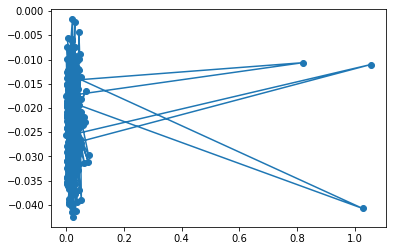

In [ ]:
plt.scatter(test_labels, test_predictions )
plt.plot(test_labels, test_predictions)

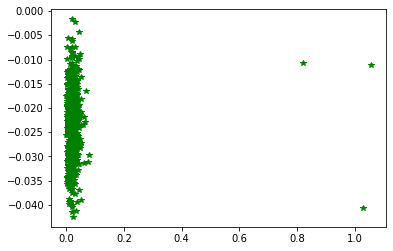

In [ ]:
plt.plot(test_labels, test_predictions,'*g')

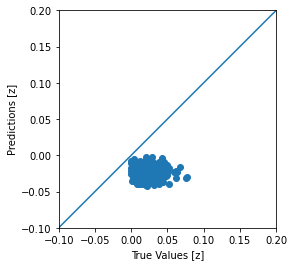

In [ ]:

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [z]')
plt.ylabel('Predictions [z]')
lims = [-0.1, 0.2]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [ ]:
test_predictions = np.load('/content/drive/MyDrive/Colab Notebooks/Vggpredictions.npy')

In [ ]:
spec=test_labels.to_numpy()

In [ ]:
type(spec)

numpy.ndarray

In [ ]:
type(test_predictions)

numpy.ndarray

In [ ]:
outlier=(spec-test_predictions)/(1+spec)

In [ ]:
outlier


array([0.05570605, 0.04343247, 0.04546971, 0.03606481, 0.0420446 ,
       0.07841644, 0.03364659, 0.03695582, 0.0399859 , 0.03987855,
       0.04088699, 0.05941351, 0.03465937, 0.04861224, 0.02443372,
       0.02827825, 0.0647164 , 0.06031569, 0.04731204, 0.04772054,
       0.03065692, 0.03400897, 0.04373228, 0.03765884, 0.03926555,
       0.03958382, 0.03997405, 0.0422092 , 0.03144616, 0.03439706,
       0.059928  , 0.07814257, 0.04572404, 0.03983254, 0.04363226,
       0.03659893, 0.03966994, 0.02282682, 0.04382992, 0.06381191,
       0.04540274, 0.05125101, 0.0441573 , 0.04717782, 0.03961649,
       0.03569803, 0.04427587, 0.03920629, 0.03972317, 0.03482013,
       0.0609932 , 0.05033795, 0.04594653, 0.03984479, 0.04912413,
       0.0325128 , 0.05089956, 0.03254527, 0.04018581, 0.03363741,
       0.04503594, 0.03381014, 0.04701475, 0.03659725, 0.04651368,
       0.05065743, 0.04067304, 0.0372151 , 0.0482008 , 0.03799259,
       0.04726753, 0.04337416, 0.0422955 , 0.04882432, 0.04533

In [ ]:
f=pd.DataFrame(outlier)

In [ ]:
f[0].median()

0.04208899146570086